In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
df = pd.read_csv('matmul.csv')
df = df[df['dynamic'] == False]
df.drop(['dynamic'], axis=1, inplace=True)

real_max = df['runtime'] * df['threads']
user_pct = df['usertime'] / real_max
user_pct = user_pct.clip(upper=1.0)
df['usertime'] /= df['threads']
df['user-pct'] = user_pct

df['energy-user'] = df['user-pct'] * df['energy']

df['W'] = df['energy'] / df['runtime']

df0 = df[df['busy'] == 0]

df

,busy,threads,energy,runtime,usertime,user-pct,energy-user,W
0,0,1,6.800965,0.434277,0.434231,0.999895,6.800248,15.660438
1,0,2,3.934070,0.217414,0.216987,0.998036,3.926345,18.094840
2,0,3,3.332090,0.157727,0.144644,0.917048,3.055686,21.125634
3,0,4,2.813802,0.109434,0.108559,0.992001,2.791294,25.712294
4,0,5,2.548607,0.093018,0.086859,0.933793,2.379872,27.399165
...,...,...,...,...,...,...,...,...
139,16,12,5.067590,0.131284,0.056140,0.427617,2.166989,38.600060
140,16,13,5.053423,0.130932,0.051257,0.391476,1.978293,38.595791
141,16,14,4.911362,0.126989,0.047748,0.376004,1.846693,38.675439
142,16,15,4.751146,0.122313,0.044669,0.365205,1.735141,38.844041


In [50]:
df_speedup = df.copy()

for col in df_speedup.columns[2:]:
    df_speedup[col] = df_speedup[col].iloc[0] / df_speedup[col]

df_speedup0 = df_speedup.loc[df_speedup['busy'] == 0]

df_speedup

,busy,threads,energy,runtime,usertime,user-pct,energy-user,W
0,0,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0,2,1.728735,1.997466,2.001185,1.001862,1.731954,0.865464
2,0,3,2.041051,2.753339,3.002077,1.090341,2.225441,0.741300
3,0,4,2.417002,3.968386,3.999965,1.007958,2.436235,0.609064
4,0,5,2.668503,4.668755,4.999247,1.070788,2.857401,0.571566
...,...,...,...,...,...,...,...,...
139,16,12,1.342051,3.307906,7.734854,2.338293,3.138109,0.405710
140,16,13,1.345813,3.316812,8.471693,2.554167,3.437432,0.405755
141,16,14,1.384741,3.419794,9.094133,2.659263,3.682391,0.404919
142,16,15,1.431437,3.550525,9.720988,2.737901,3.919132,0.403162


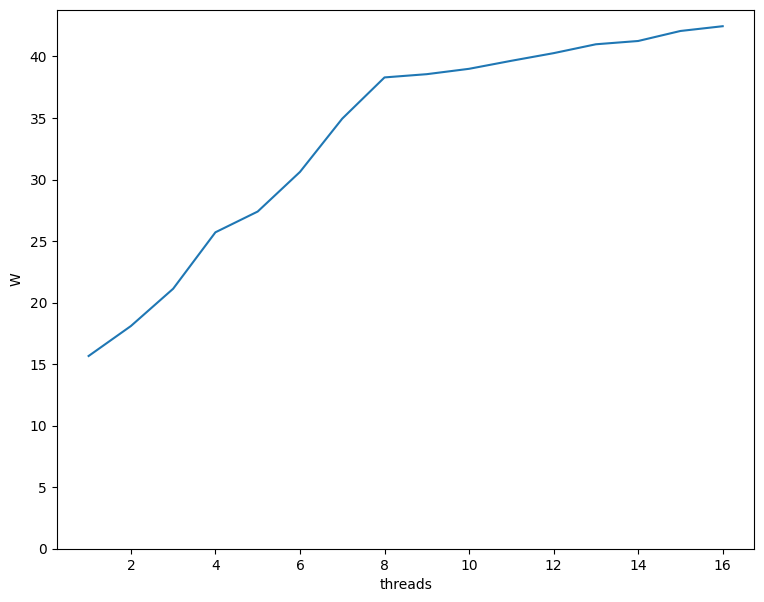

In [51]:
plt.figure(figsize=(9,7))
ax = sns.lineplot(df0, x='threads', y='W')
ax.set_ylim((0, None))
plt.show()

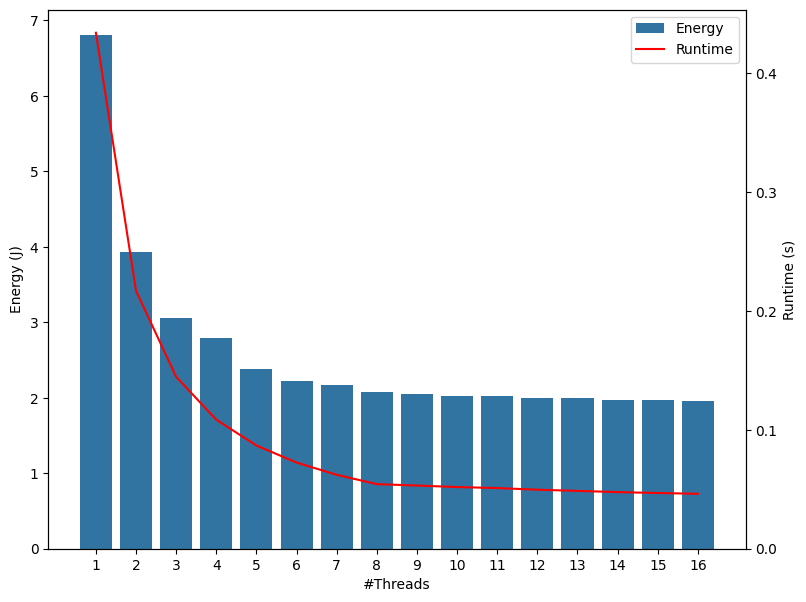

In [52]:
plt.figure(figsize=(9,7))

ax1 = sns.barplot(df0, x='threads', y='energy-user', label='Energy', legend=False)

ax2 = ax1.twinx()

sns.lineplot(df0, x=df0.index, y='usertime', label='Runtime', color='r', ax=ax2)

ax1.set_xlabel('#Threads')
ax1.set_ylabel('Energy (J)')
ax2.set_ylabel('Runtime (s)')
ax2.set_ylim((0, None))

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2)

plt.show()

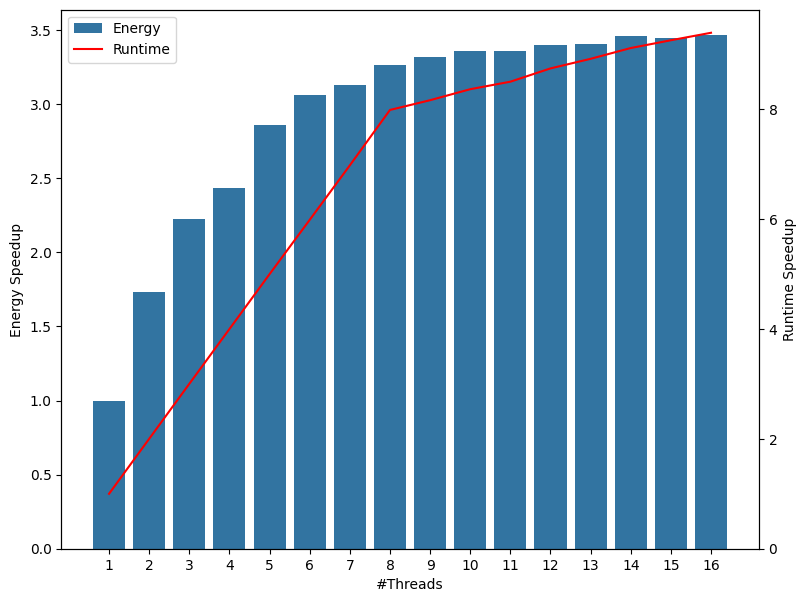

In [53]:
plt.figure(figsize=(9,7))

ax1 = sns.barplot(df_speedup0, x='threads', y='energy-user', label='Energy', legend=False)

ax2 = ax1.twinx()

sns.lineplot(df_speedup0, x=df_speedup0.index, y='usertime', label='Runtime', color='r', ax=ax2)

ax1.set_xlabel('#Threads')
ax1.set_ylabel('Energy Speedup')
ax2.set_ylabel('Runtime Speedup')
ax2.set_ylim((0, None))

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2)

plt.show()

# With busy threads

In [54]:
for (busy, df_busy) in df.groupby('busy'):
    best = df_busy[df_busy['energy'] == df_busy['energy'].min()].iloc[0]
    print(busy, '\t', int(best['threads']), '\t', best['energy'])

0 	 16 	 2.016749
2 	 15 	 2.19230457
4 	 12 	 2.44909469
6 	 16 	 2.72563145
8 	 13 	 3.10010926
10 	 16 	 3.65535075
12 	 16 	 4.75255375
14 	 16 	 6.07676178
16 	 16 	 4.68130576


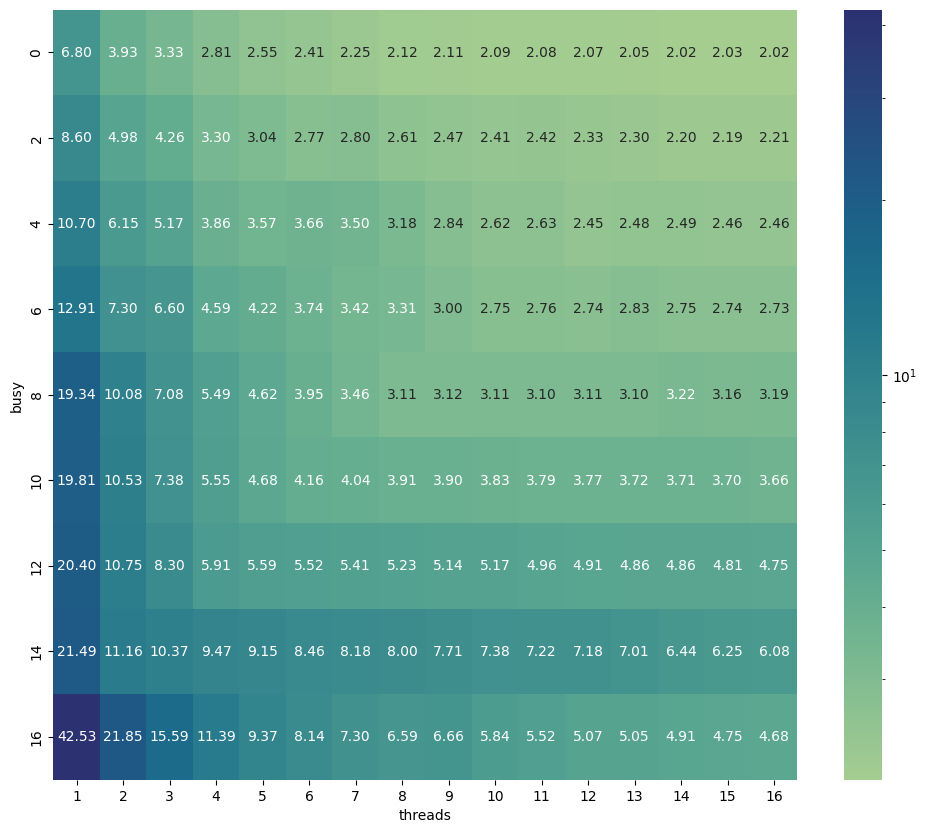

In [55]:
from matplotlib.colors import LogNorm, Normalize

plt.figure(figsize=(12,10))
df_pivot = df.pivot(index='busy', columns='threads', values='energy')
sns.heatmap(df_pivot, annot=True, fmt='.2f', cmap='crest', norm=LogNorm())
plt.show()

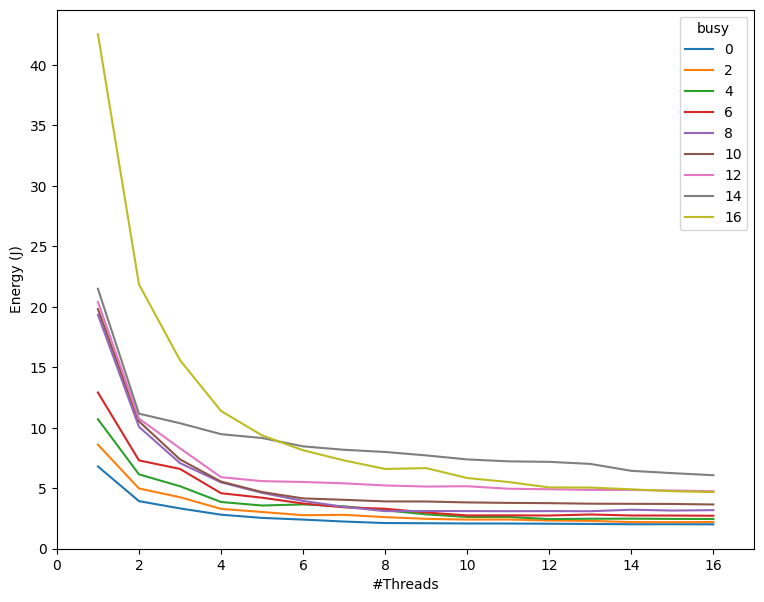

In [56]:
plt.figure(figsize=(9,7))

ax = sns.lineplot(df, x='threads', y='energy', hue=df['busy'].astype('category'))

ax.set_xlabel('#Threads')
ax.set_ylabel('Energy (J)')
ax.set_xlim((0, 17))
ax.set_ylim((0, None))

plt.show()

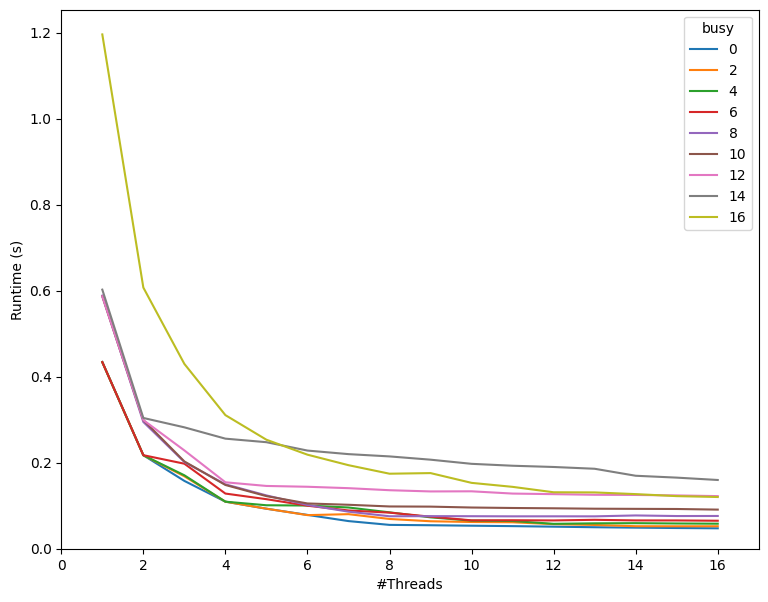

In [57]:
plt.figure(figsize=(9,7))

ax = sns.lineplot(df, x='threads', y='runtime', hue=df['busy'].astype('category'))

ax.set_xlabel('#Threads')
ax.set_ylabel('Runtime (s)')
ax.set_xlim((0, 17))
ax.set_ylim((0, None))

plt.show()

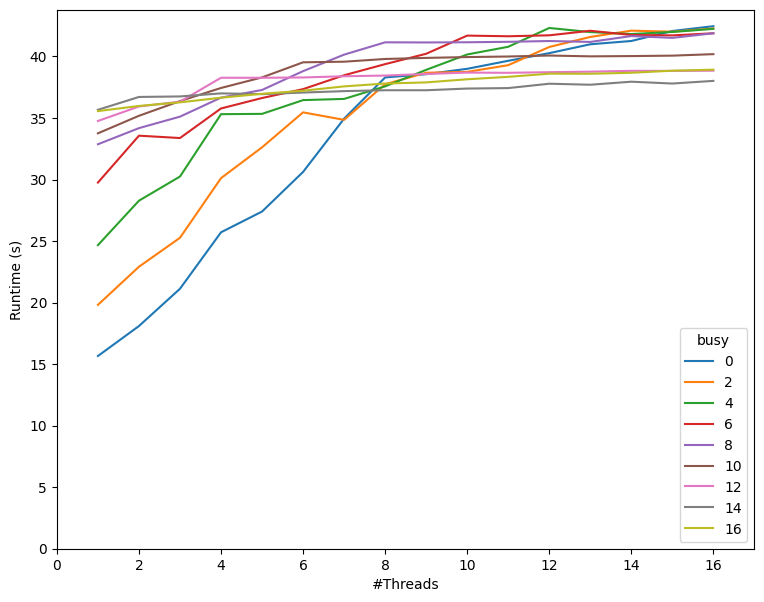

In [58]:
plt.figure(figsize=(9,7))

ax = sns.lineplot(df, x='threads', y='W', hue=df['busy'].astype('category'))

ax.set_xlabel('#Threads')
ax.set_ylabel('Runtime (s)')
ax.set_xlim((0, 17))
ax.set_ylim((0, None))

plt.show()